In [18]:
# importing dependencies / libraries 
import numpy as np
import pandas as pd

In [19]:
data=pd.read_csv("mail_data.csv", encoding="latin-1")

In [20]:
data.head(7)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...


In [21]:
# now convertig our class name into numerical values 
data['Category']=data['Category'].map({'ham':0, 'spam':1})

In [22]:
#  checking MIssing Values 
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [23]:
# Checking duplicate values 
data.duplicated().sum()

415

In [24]:
# Now removing duplicate values 
data=data.drop_duplicates(keep='first')

In [25]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


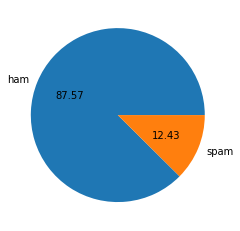

In [9]:
# analyze from pi chart 
import matplotlib.pyplot as plt 
plt.pie(data['Category'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(data.Message,data.Category,test_size=0.2, random_state=40)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
countvectorizerMeaasge=v.fit_transform(x_train.values)
countvectorizerMeaasge.toarray()[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [13]:
model.fit(countvectorizerMeaasge,y_train)

MultinomialNB()

In [14]:
x_test_count=v.transform(x_test)
model.score(x_test_count, y_test)
#  98% accuracy of testing data 

0.9844961240310077

In [15]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
               ('Vectorizer', CountVectorizer()),
               ('nb', MultinomialNB())
])
clf.fit(x_train, y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [16]:
clf.score(x_test, y_test)

0.9844961240310077

In [17]:
import joblib
joblib.dump(clf,"My_Spam_model.pkl")

['My_Spam_model.pkl']